In [4]:
# Maternal Health Risk Prediction 
#I will start with importing my libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import learning_curve

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb



In [5]:
# Loading my dataset
df = pd.read_csv("Maternal Health Risk Data Set.csv")

In [6]:
# Inspect data
print(df.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None


In [8]:
print(df['RiskLevel'].value_counts())

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


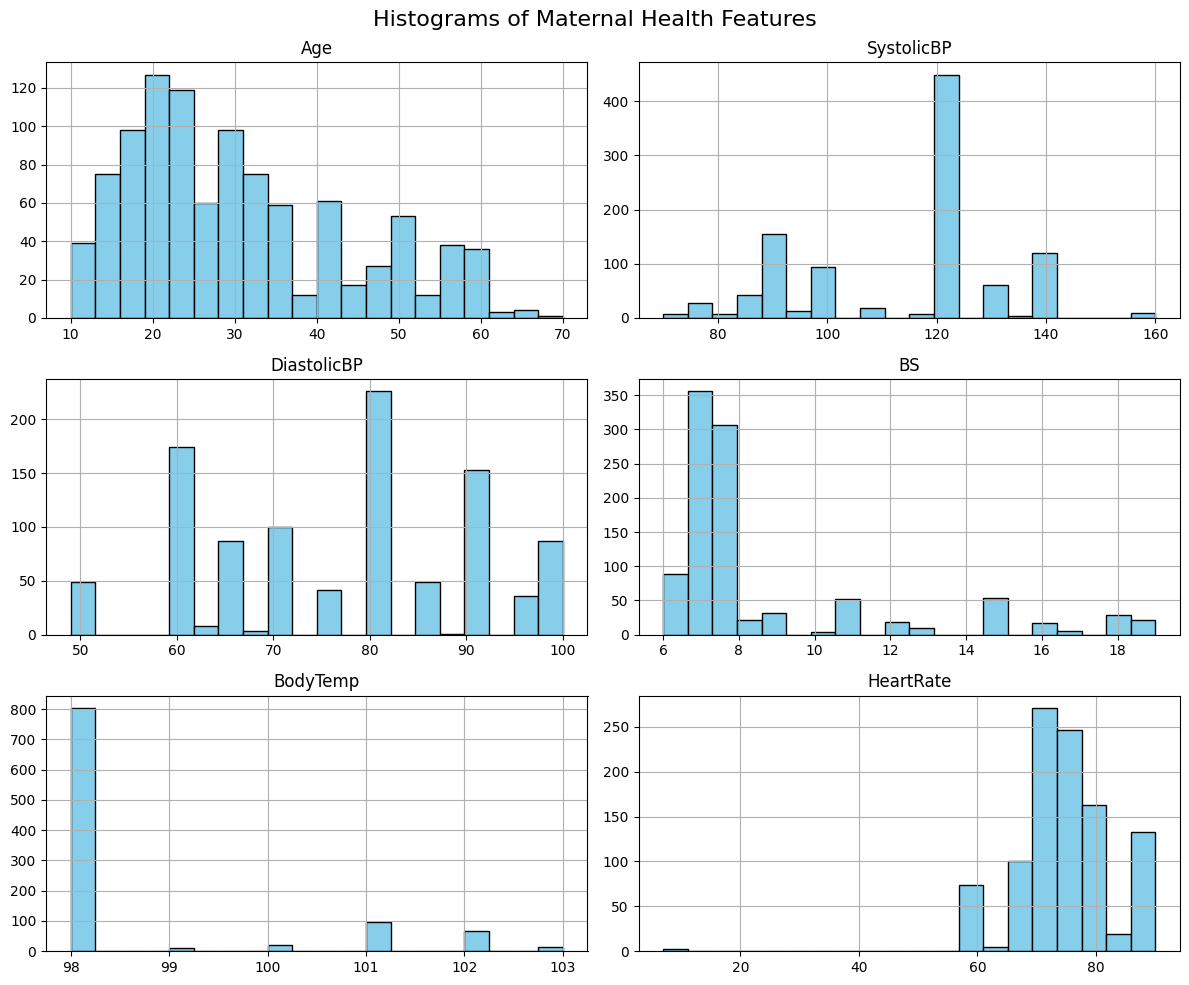

In [9]:
# List of numeric columns (excluding target)
num_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Plot histograms
df[num_cols].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')

plt.suptitle("Histograms of Maternal Health Features", fontsize=16)
plt.tight_layout()
plt.show()

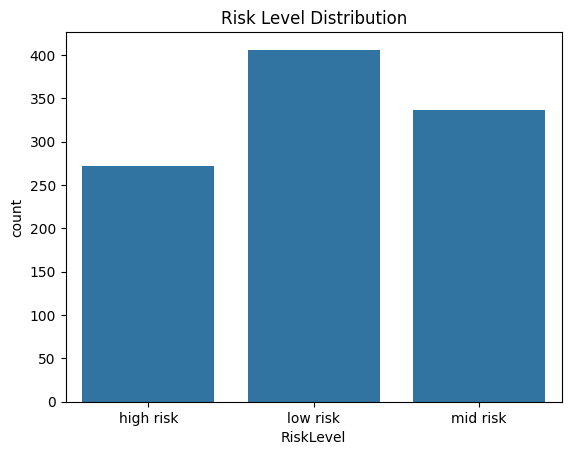

In [10]:
# EDA: Risk level distribution
sns.countplot(x='RiskLevel', data=df)
plt.title("Risk Level Distribution")
plt.show()

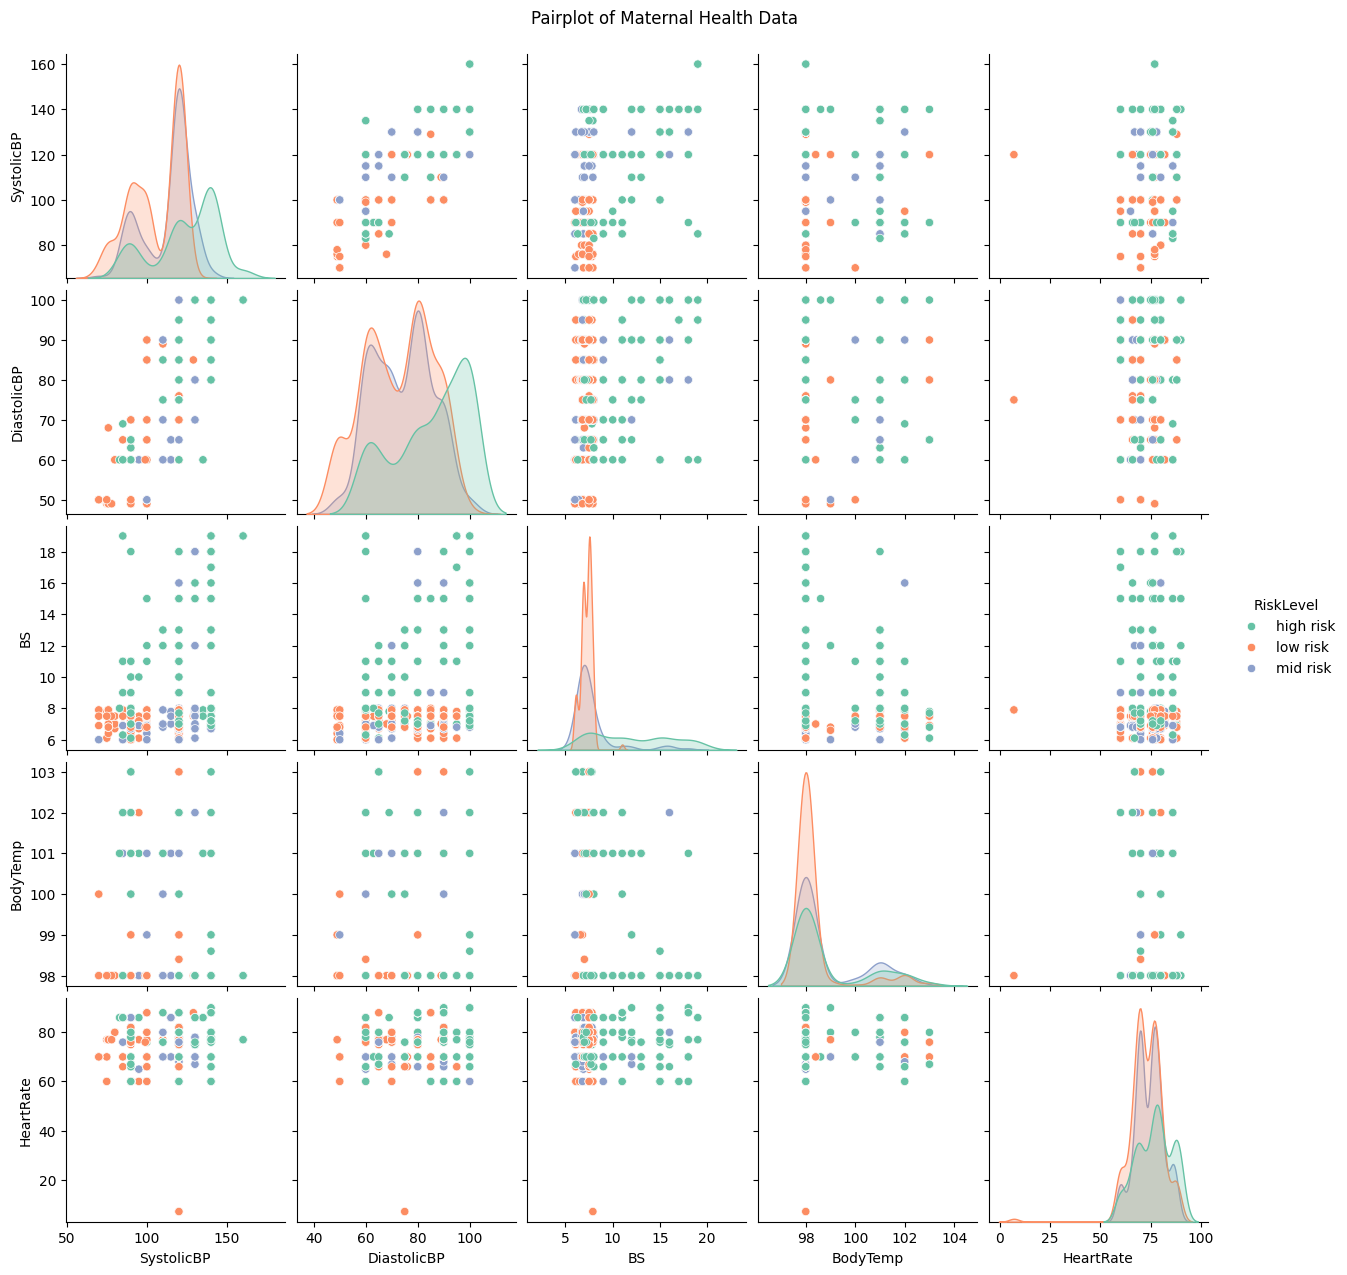

In [11]:
# Pairplot visualization to assess linearity
sns.pairplot(
    df,
    vars=['SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],
    hue='RiskLevel',
    diag_kind='kde',
    palette='Set2'
)

plt.suptitle("Pairplot of Maternal Health Data", y=1.02)
plt.show()

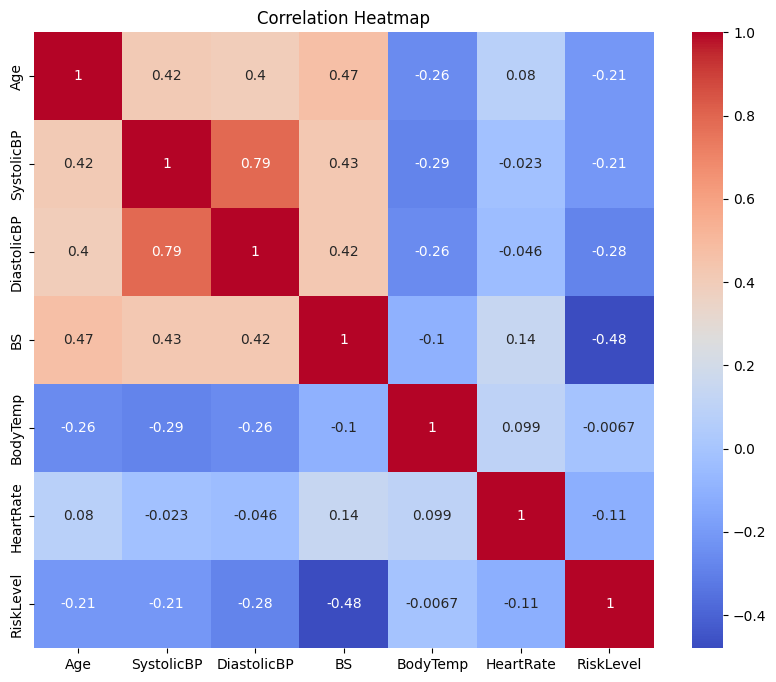

In [13]:

le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df['RiskLevel'])  # low risk=0, mid risk=1, high risk=2

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


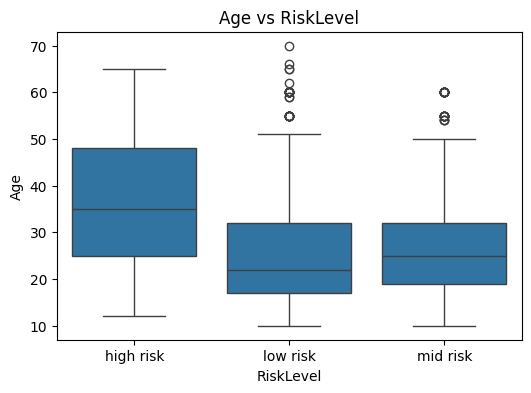

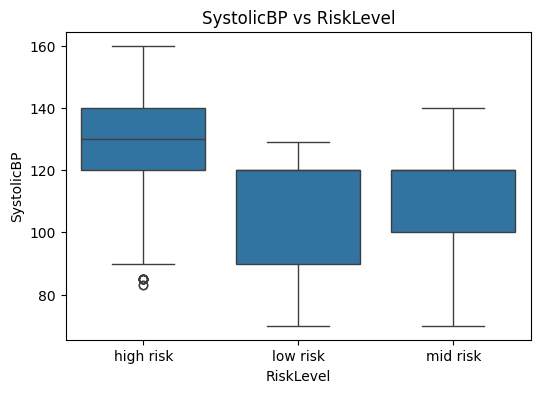

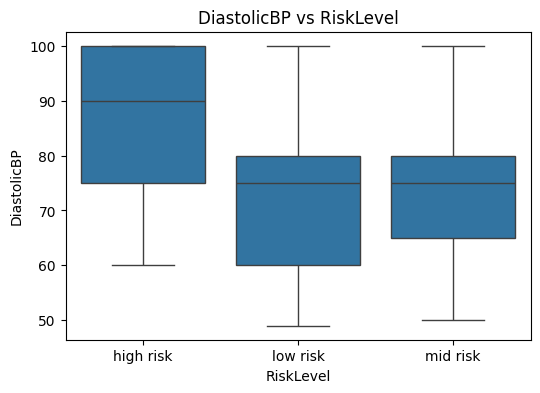

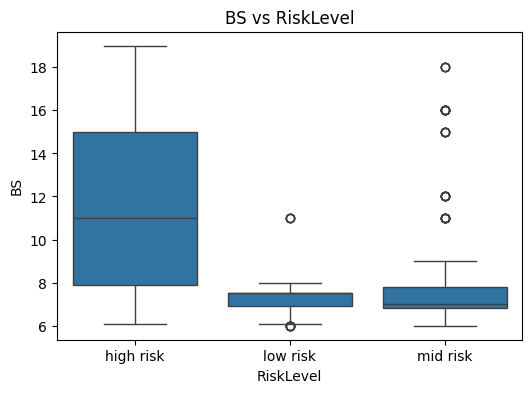

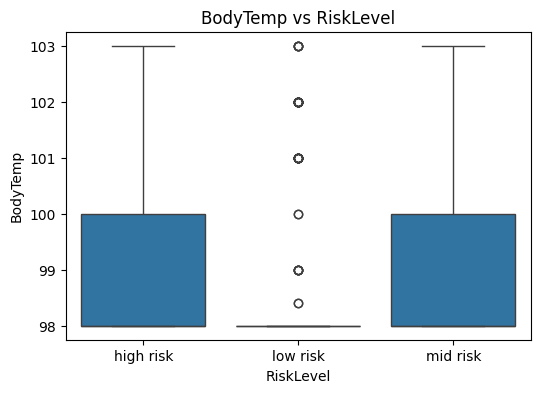

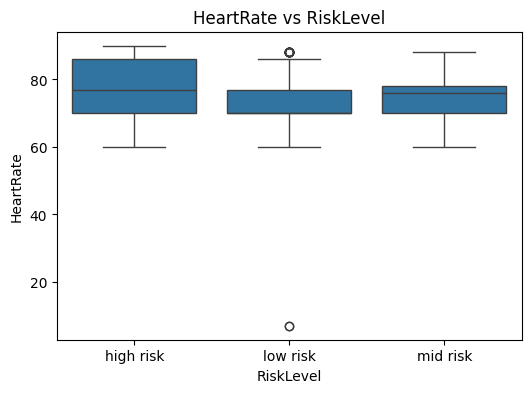

In [12]:
# EDA: Boxplots for features vs RiskLevel
features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='RiskLevel', y=feature, data=df)
    plt.title(f"{feature} vs RiskLevel")
    plt.show()

In [13]:
# Features and target
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

In [14]:
# Check for any missing values 
print("Missing values:")
print(df.isnull().sum())

Missing values:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
# Define models in pipelines
pipelines = {
    'RandomForest': Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', probability=True, random_state=42))
    ])
}



RandomForest Model:
Training Accuracy: 0.9248
Testing Accuracy: 0.8621

Training Classification Report:
              precision    recall  f1-score   support

   high risk       0.93      0.95      0.94       217
    low risk       0.94      0.92      0.93       325
    mid risk       0.90      0.91      0.90       269

    accuracy                           0.92       811
   macro avg       0.92      0.93      0.93       811
weighted avg       0.92      0.92      0.92       811

Testing Classification Report:
              precision    recall  f1-score   support

   high risk       0.96      0.95      0.95        55
    low risk       0.89      0.80      0.84        81
    mid risk       0.76      0.87      0.81        67

    accuracy                           0.86       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.86      0.86       203



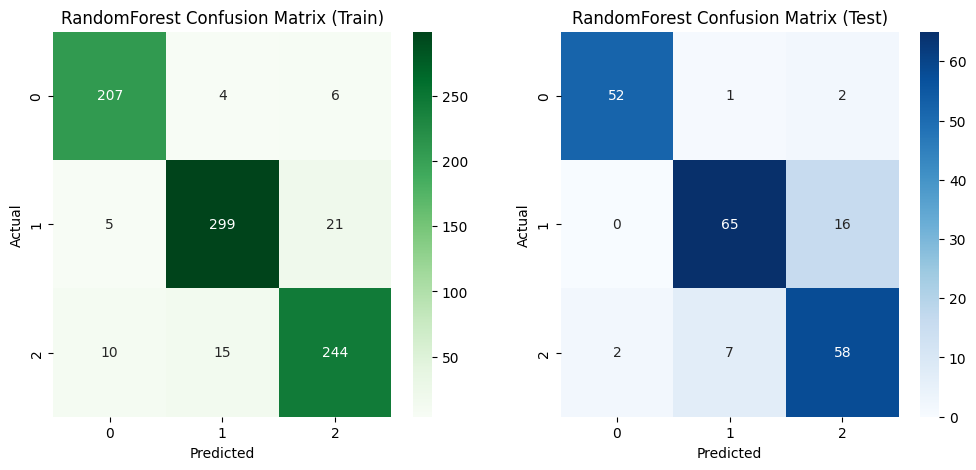


XGBoost Model:


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:22:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Accuracy: 0.9248
Testing Accuracy: 0.8571

Training Classification Report:
              precision    recall  f1-score   support

   high risk       0.93      0.96      0.94       217
    low risk       0.93      0.93      0.93       325
    mid risk       0.91      0.90      0.90       269

    accuracy                           0.92       811
   macro avg       0.92      0.93      0.93       811
weighted avg       0.92      0.92      0.92       811

Testing Classification Report:
              precision    recall  f1-score   support

   high risk       0.93      0.91      0.92        55
    low risk       0.92      0.80      0.86        81
    mid risk       0.76      0.88      0.81        67

    accuracy                           0.86       203
   macro avg       0.87      0.86      0.86       203
weighted avg       0.87      0.86      0.86       203



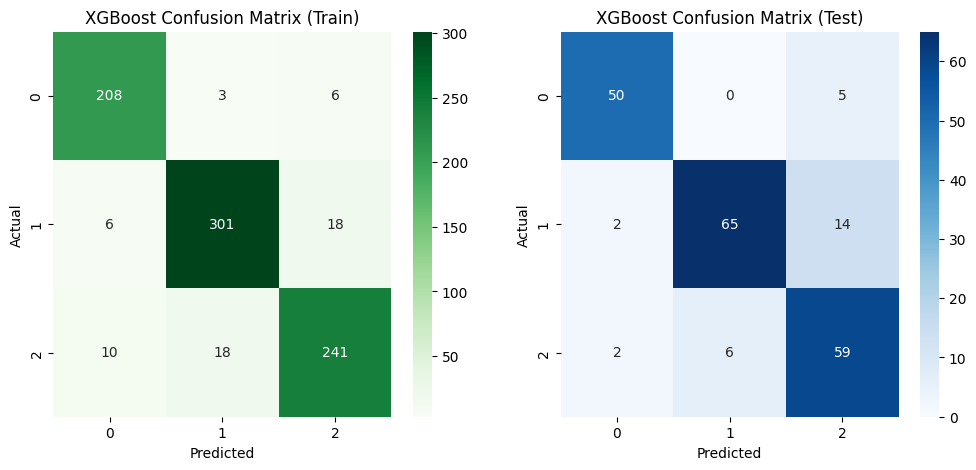


SVM Model:
Training Accuracy: 0.7213
Testing Accuracy: 0.7241

Training Classification Report:
              precision    recall  f1-score   support

   high risk       0.83      0.83      0.83       217
    low risk       0.69      0.87      0.77       325
    mid risk       0.67      0.45      0.54       269

    accuracy                           0.72       811
   macro avg       0.73      0.72      0.71       811
weighted avg       0.72      0.72      0.71       811

Testing Classification Report:
              precision    recall  f1-score   support

   high risk       0.96      0.87      0.91        55
    low risk       0.63      0.90      0.74        81
    mid risk       0.70      0.39      0.50        67

    accuracy                           0.72       203
   macro avg       0.76      0.72      0.72       203
weighted avg       0.74      0.72      0.71       203



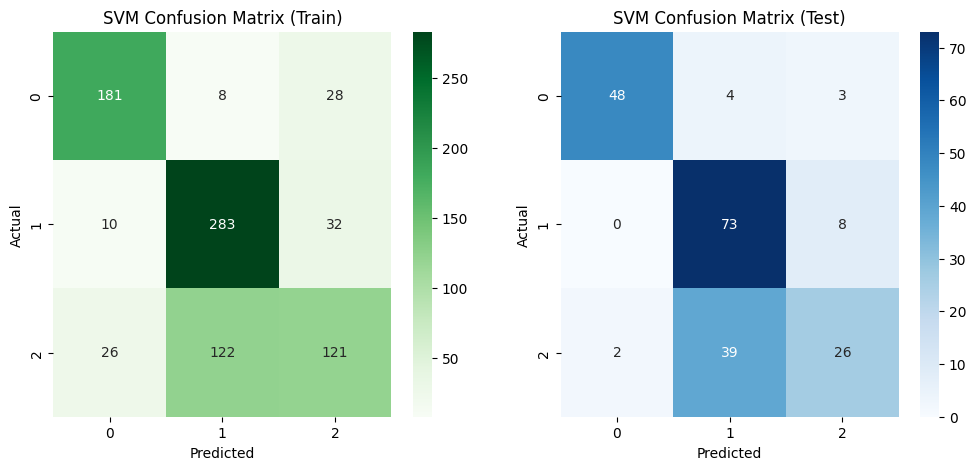

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train and evaluate models
for name, pipeline in pipelines.items():
    print(f"\n{name} Model:")
    pipeline.fit(X_train, y_train_encoded)  # use encoded labels
    
    # Predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Accuracy
    train_acc = accuracy_score(y_train_encoded, y_train_pred)
    test_acc = accuracy_score(y_test_encoded, y_test_pred)
    
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}\n")
    
    # Classification reports
    print("Training Classification Report:")
    print(classification_report(y_train_encoded, y_train_pred, target_names=le.classes_))
    
    print("Testing Classification Report:")
    print(classification_report(y_test_encoded, y_test_pred, target_names=le.classes_))
    
    # Confusion matrices
    fig, axes = plt.subplots(1,2, figsize=(12,5))
    
    sns.heatmap(confusion_matrix(y_train_encoded, y_train_pred), annot=True, fmt='d', cmap='Greens', ax=axes[0])
    axes[0].set_title(f"{name} Confusion Matrix (Train)")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    
    sns.heatmap(confusion_matrix(y_test_encoded, y_test_pred), annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[1].set_title(f"{name} Confusion Matrix (Test)")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    
    plt.show()


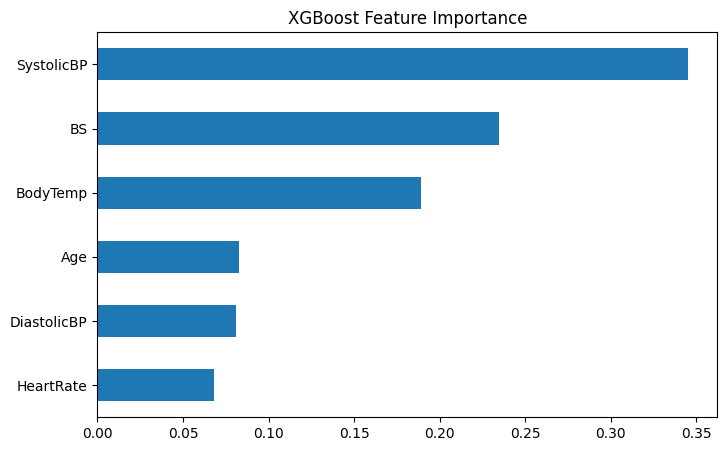

In [20]:
# Get XGBoost model from the pipeline
xgb_model = pipelines['XGBoost'].named_steps['xgb']

# Feature importance
importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("XGBoost Feature Importance")
plt.show()



In [22]:
# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define parameter grid for XGBoost
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 4, 5, 6],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.8, 0.9, 1.0]
}

# Weighted F1-score for multiclass
f1_weighted = make_scorer(f1_score, average='weighted')

# Grid search with cross-validation
xgb_pipeline = pipelines['XGBoost']
grid_search = GridSearchCV(
    xgb_pipeline, 
    param_grid, 
    cv=5, 
    scoring=f1_weighted,
    n_jobs=-1,
    verbose=1
)

print("Tuning XGBoost hyperparameters...")
grid_search.fit(X_train, y_train_encoded)  # use encoded labels

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

# Best model
best_xgb = grid_search.best_estimator_

Tuning XGBoost hyperparameters...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:27:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'xgb__colsample_bytree': 0.9, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 6, 'xgb__n_estimators': 300, 'xgb__subsample': 1.0}
Best CV score: 0.8299


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:30:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:30:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:30:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:30:06] WARNING: C:\actions-r

Cross-Validation Results:
Test Accuracy: 0.8299 ± 0.0157
Test F1-Score: 0.8299 ± 0.0161
Test Precision: 0.8320 ± 0.0175
Test Recall: 0.8299 ± 0.0157

Overfitting Check:
Train Accuracy: 0.9285
Test Accuracy: 0.8299
Difference: 0.0986


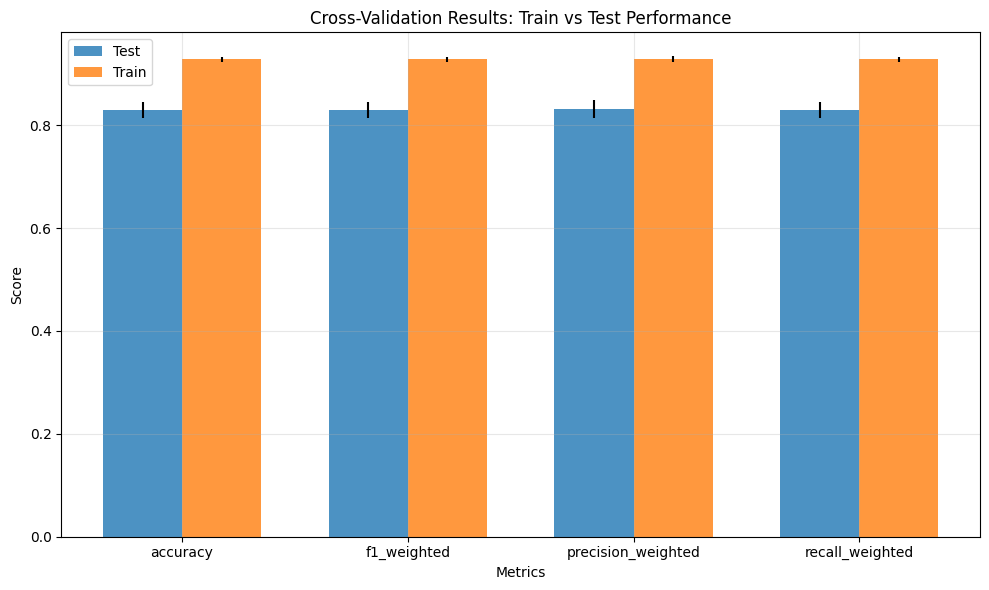

In [24]:
from sklearn.model_selection import cross_validate
# Perform cross-validation on the best model
cv_scores = cross_validate(
    best_xgb, 
    X_train, 
    y_train_encoded,  # use encoded labels
    cv=5,
    scoring=['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted'],
    return_train_score=True
)

# Display results
print("Cross-Validation Results:")
print(f"Test Accuracy: {cv_scores['test_accuracy'].mean():.4f} ± {cv_scores['test_accuracy'].std():.4f}")
print(f"Test F1-Score: {cv_scores['test_f1_weighted'].mean():.4f} ± {cv_scores['test_f1_weighted'].std():.4f}")
print(f"Test Precision: {cv_scores['test_precision_weighted'].mean():.4f} ± {cv_scores['test_precision_weighted'].std():.4f}")
print(f"Test Recall: {cv_scores['test_recall_weighted'].mean():.4f} ± {cv_scores['test_recall_weighted'].std():.4f}")

# Check for overfitting
train_acc_mean = cv_scores['train_accuracy'].mean()
test_acc_mean = cv_scores['test_accuracy'].mean()
print(f"\nOverfitting Check:")
print(f"Train Accuracy: {train_acc_mean:.4f}")
print(f"Test Accuracy: {test_acc_mean:.4f}")
print(f"Difference: {train_acc_mean - test_acc_mean:.4f}")

# Visualize CV scores
metrics = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']
test_scores = [cv_scores[f'test_{metric}'] for metric in metrics]
train_scores = [cv_scores[f'train_{metric}'] for metric in metrics]

fig, ax = plt.subplots(figsize=(10, 6))
x_pos = np.arange(len(metrics))

# Plot means and error bars
test_means = [scores.mean() for scores in test_scores]
test_stds = [scores.std() for scores in test_scores]
train_means = [scores.mean() for scores in train_scores]
train_stds = [scores.std() for scores in train_scores]

width = 0.35
ax.bar(x_pos - width/2, test_means, width, yerr=test_stds, label='Test', alpha=0.8)
ax.bar(x_pos + width/2, train_means, width, yerr=train_stds, label='Train', alpha=0.8)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Cross-Validation Results: Train vs Test Performance')
ax.set_xticks(x_pos)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Final Model Performance on Test Set:
Accuracy: 0.8571

Detailed Per-Class Performance:

Low Risk:
  Precision: 0.9259
  Recall: 0.9091
  F1-Score: 0.9174
  Support: 55

Mid Risk:
  Precision: 0.9155
  Recall: 0.8025
  F1-Score: 0.8553
  Support: 81

High Risk:
  Precision: 0.7564
  Recall: 0.8806
  F1-Score: 0.8138
  Support: 67


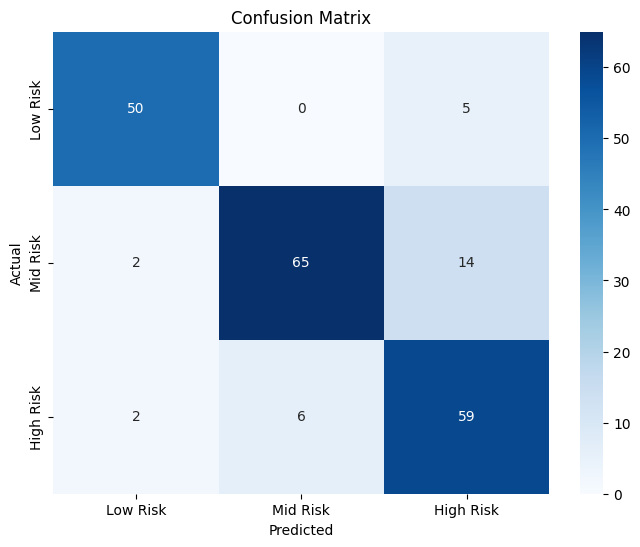

In [26]:
# Encode y_test
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(['low risk', 'mid risk', 'high risk'])  # make sure the order matches
y_test_encoded = le.transform(y_test)

# If y_pred_final is numeric, we can use it directly
y_pred_final_encoded = y_pred_final  # already numeric

# Now calculate metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

print("Final Model Performance on Test Set:")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_final_encoded):.4f}")

# Per-class metrics
precision, recall, f1, support = precision_recall_fscore_support(
    y_test_encoded, y_pred_final_encoded, average=None
)

class_names = ['Low Risk', 'Mid Risk', 'High Risk']  # same order as LabelEncoder

print("\nDetailed Per-Class Performance:")
for i, class_name in enumerate(class_names):
    print(f"\n{class_name}:")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall: {recall[i]:.4f}")
    print(f"  F1-Score: {f1[i]:.4f}")
    print(f"  Support: {support[i]}")

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_encoded, y_pred_final_encoded)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


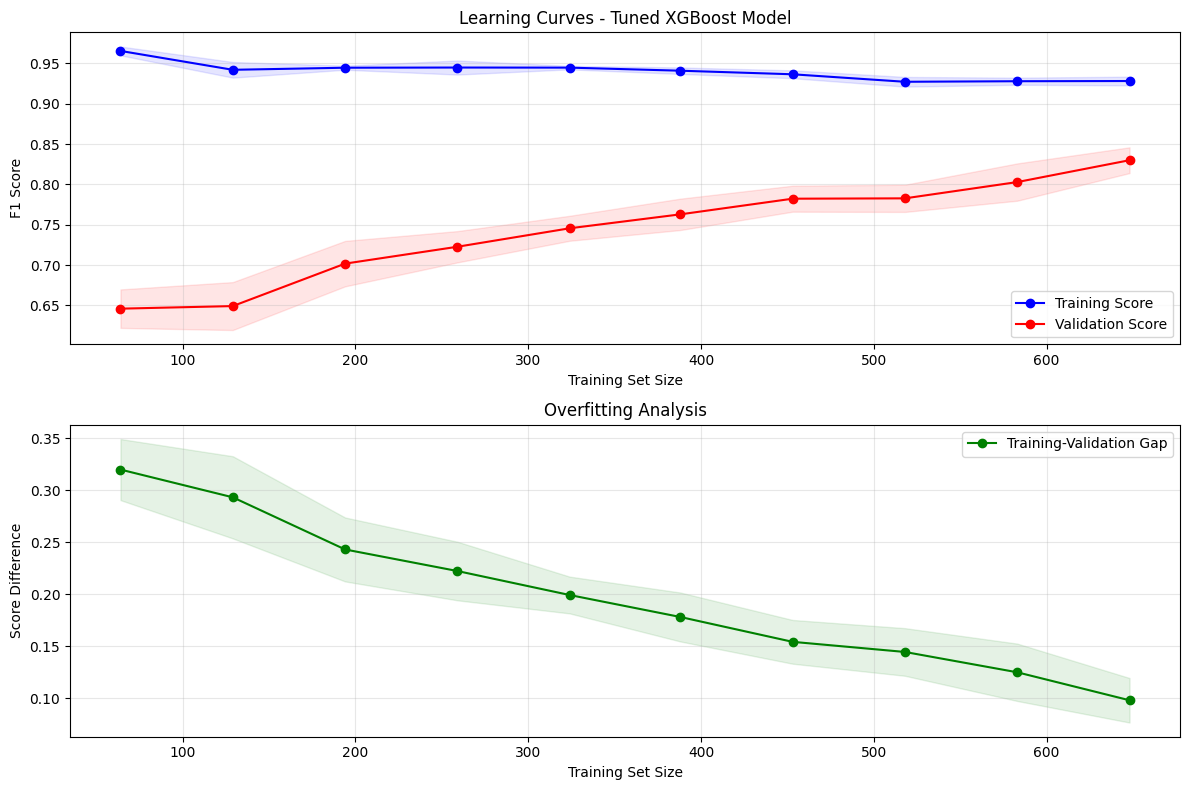

In [28]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Encode y_train
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # numeric labels 0,1,2

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    best_xgb, X_train, y_train_encoded, 
    cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='f1_weighted',
    n_jobs=-1
)

# Calculate means and stds
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curves - Tuned XGBoost Model')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
gap = train_mean - val_mean
plt.plot(train_sizes, gap, 'o-', color='green', label='Training-Validation Gap')
plt.fill_between(train_sizes, gap - (train_std + val_std), gap + (train_std + val_std), alpha=0.1, color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Score Difference')
plt.title('Overfitting Analysis')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
